In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configure matplotlib for better visualization defaults 
# plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the Wine Dataset 
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target_names'] = df['target'].apply(lambda x: wine.target_names[x])

print("Wine Dataset Loaded")
print(df.head())
print("\nDataFrame Info:")
df.info()

Wine Dataset Loaded
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  

In [9]:
# 1. Display the Basic Statistics using describe()
print("1. Basic Statistics (df.describe())")
basic_stats = df.describe().transpose()
print(basic_stats)

1. Basic Statistics (df.describe())
                              count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid                    178.0    2.336348    1.117146    0.74    1.6025   
ash                           178.0    2.366517    0.274344    1.36    2.2100   
alcalinity_of_ash             178.0   19.494944    3.339564   10.60   17.2000   
magnesium                     178.0   99.741573   14.282484   70.00   88.0000   
total_phenols                 178.0    2.295112    0.625851    0.98    1.7425   
flavanoids                    178.0    2.029270    0.998859    0.34    1.2050   
nonflavanoid_phenols          178.0    0.361854    0.124453    0.13    0.2700   
proanthocyanins               178.0    1.590899    0.572359    0.41    1.2500   
color_intensity               178.0    5.058090    2.318286    1.28    3.2200   
hue                           178.0    0.957449    0.228572    0.48    0.

2. Generating Boxplot of Features by Class


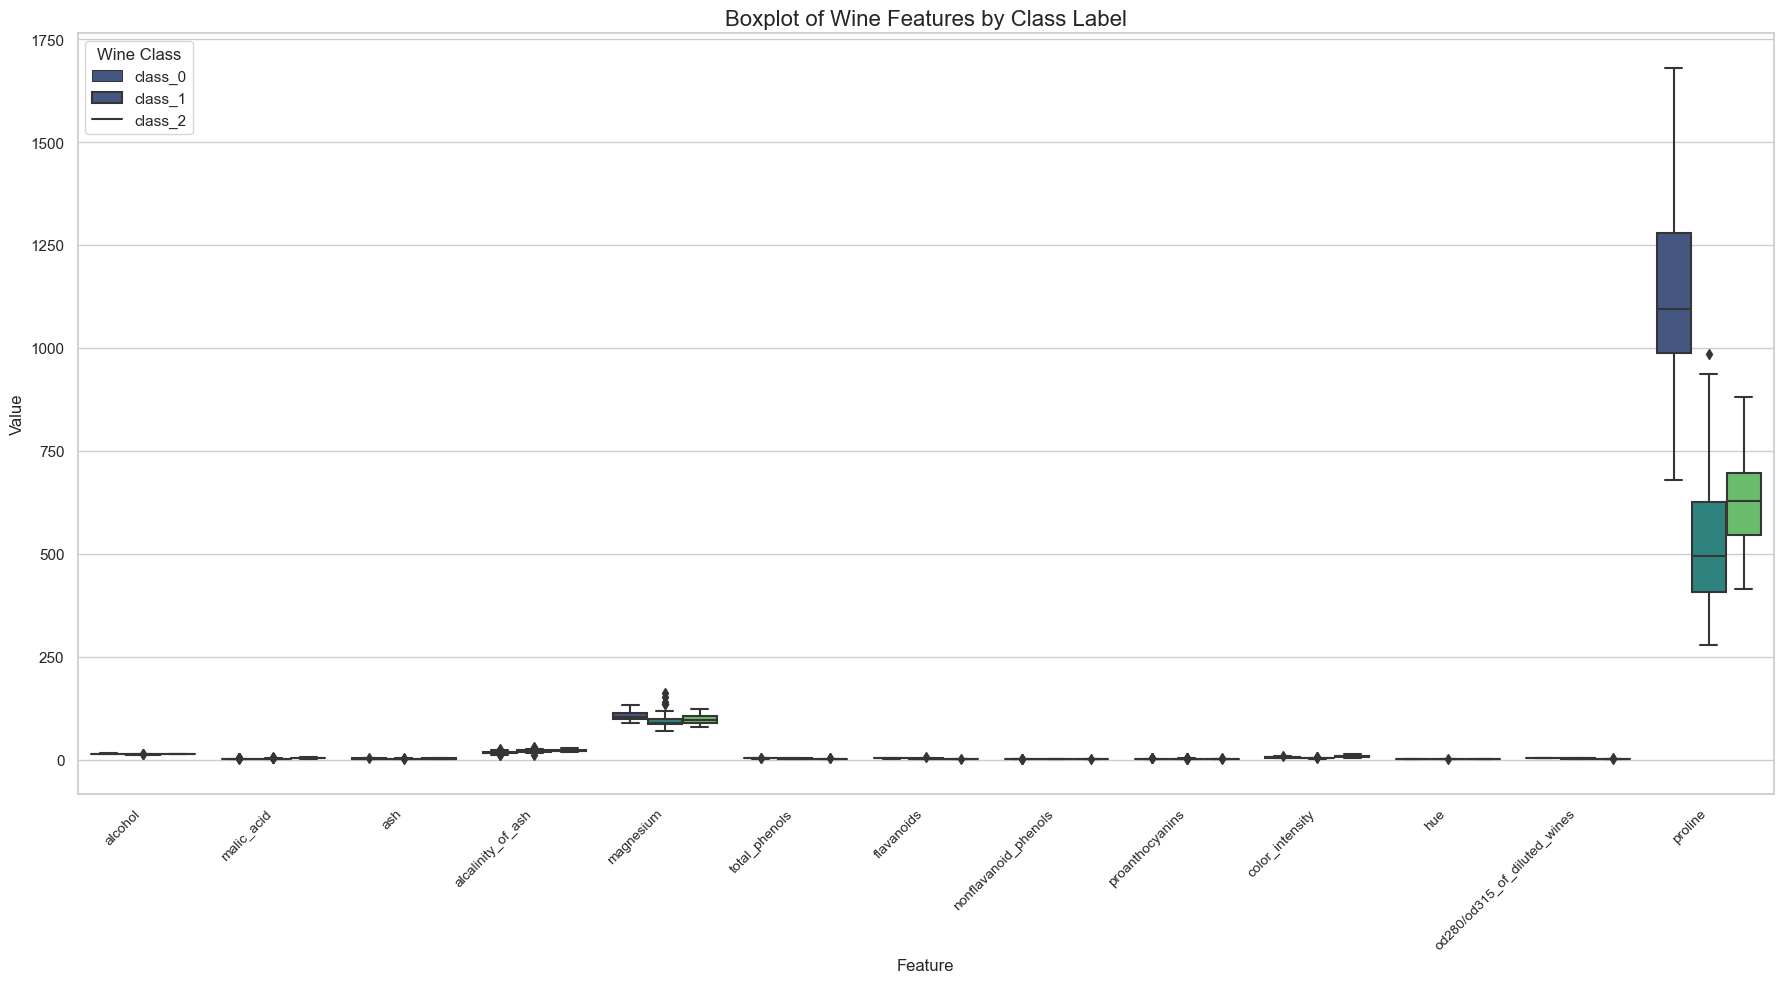

In [11]:
# 2. Boxplot by output labels/classes
print("2. Generating Boxplot of Features by Class")

# Melt the DataFrame to long format for easier plotting with seaborn
df_melted = df.drop('target_names', axis=1).melt(
    id_vars='target', 
    var_name='feature', 
    value_name='value'
)
plt.figure(figsize=(18, 10))
# Create boxplot: x-axis are features, y-axis is value, separated by 'target' (hue)
sns.boxplot(
    x='feature', 
    y='value', 
    hue='target', 
    data=df_melted, 
    palette="viridis"
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Boxplot of Wine Features by Class Label', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Wine Class', labels=wine.target_names)
plt.tight_layout()
plt.show()

3.Generating Scatterplot (Alcohol vs. Malic Acid)


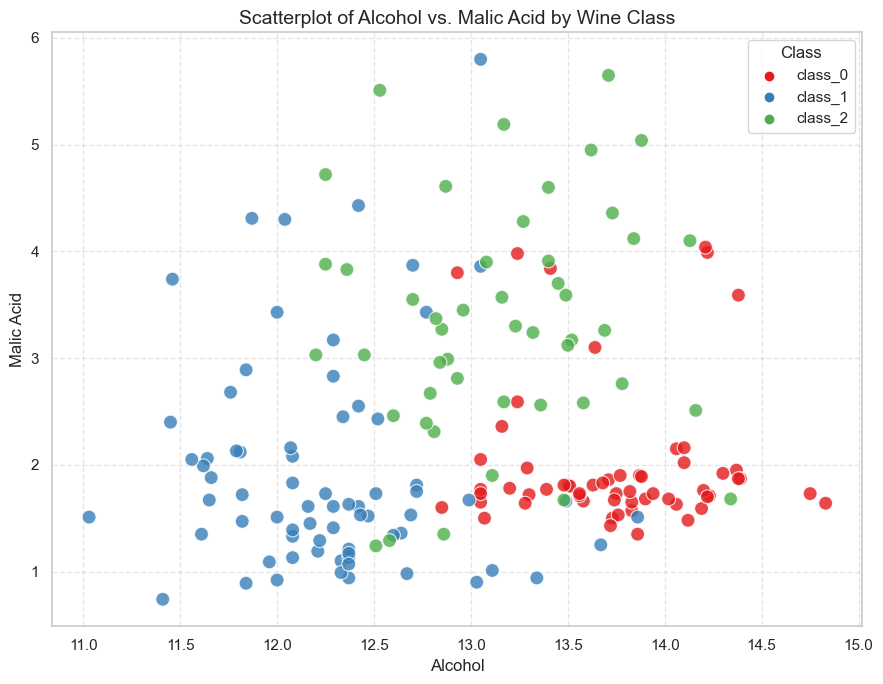

In [12]:
# 3. Scatterplot using two variable ('alcohol' and 'malic_acid')
print("3.Generating Scatterplot (Alcohol vs. Malic Acid)")
plt.figure(figsize=(9, 7))
sns.scatterplot(
    x='alcohol', 
    y='malic_acid', 
    hue='target_names', 
    data=df, 
    palette='Set1', 
    s=100, 
    alpha=0.8
)
plt.title('Scatterplot of Alcohol vs. Malic Acid by Wine Class', fontsize=14)
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Malic Acid', fontsize=12)
plt.legend(title='Class')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

4.Generating Covariance Matrix Heatmap


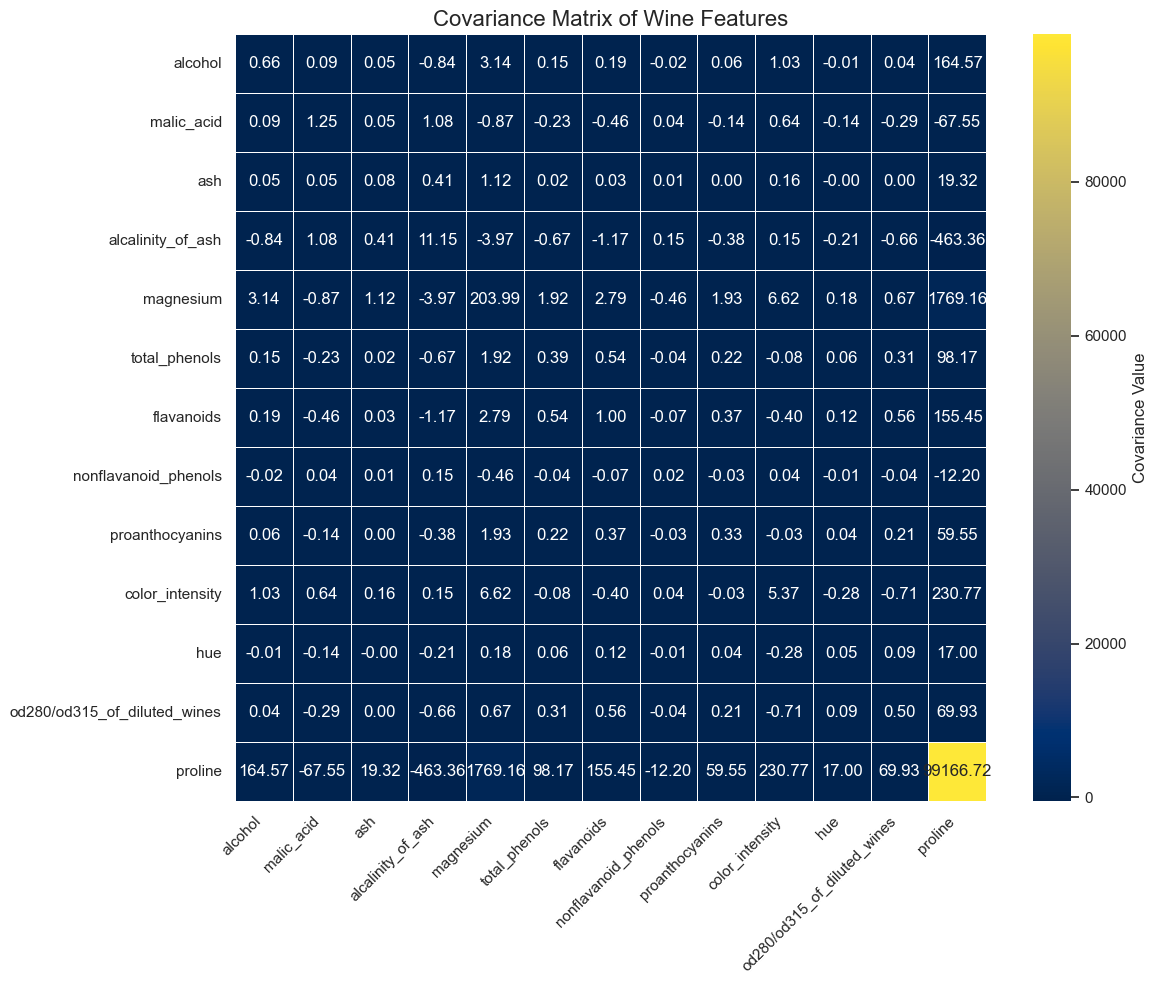

In [13]:
# 4. Plot Co-Variance Matrix
print("4.Generating Covariance Matrix Heatmap")
# Drop non-numeric/target columns for covariance calculation
df_features = df.drop(['target', 'target_names'], axis=1)
cov_matrix = df_features.cov()

plt.figure(figsize=(12, 10))
# Plot heatmap with covariance values annotated
sns.heatmap(
    cov_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='cividis', 
    linewidths=.5, 
    linecolor='white', 
    cbar_kws={'label': 'Covariance Value'}
)
plt.title('Covariance Matrix of Wine Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# 5. Data Scaling
print("5.Data Scaling (StandardScaler)")
# Separate features (X) and target (y)
X = df.drop(['target', 'target_names'], axis=1).values
y = df['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=df_features.columns)
print("Scaled Feature Data (Head):")
print(X_scaled_df.head())

5.Data Scaling (StandardScaler)
Scaled Feature Data (Head):
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177           

6.Principal Component Analysis (PCA) for Class Separation
Explained Variance Ratio by PC1: 0.3620
Explained Variance Ratio by PC2: 0.1921
Total Explained Variance (PC1 + PC2): 0.5541


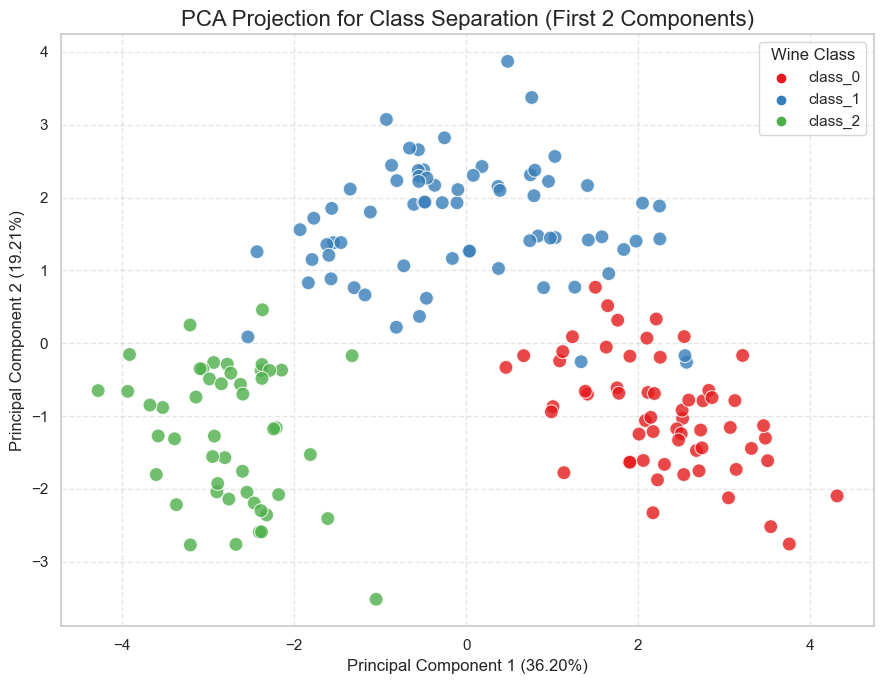


Analysis complete.


In [20]:
# 6. Show better class separation using principal components (PCA)
print("6.Principal Component Analysis (PCA) for Class Separation")

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for the 2 principal components
pca_df = pd.DataFrame(
    data=principal_components, 
    columns=['principal_component_1', 'principal_component_2']
)
pca_df['target_names'] = df['target_names']
pca_df['target'] = df['target'] # Keep target numeric for hue mapping

# Print explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio by PC1: {explained_variance[0]:.4f}")
print(f"Explained Variance Ratio by PC2: {explained_variance[1]:.4f}")
print(f"Total Explained Variance (PC1 + PC2): {explained_variance.sum():.4f}")

# Plot the 2 principal components
plt.figure(figsize=(9, 7))
sns.scatterplot(
    x='principal_component_1', 
    y='principal_component_2', 
    hue='target_names', 
    data=pca_df, 
    palette='Set1', 
    s=100, 
    alpha=0.8
)
plt.title('PCA Projection for Class Separation (First 2 Components)', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)', fontsize=12)
plt.legend(title='Wine Class')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
# Clean up
del df, df_features, X, y, X_scaled, pca_df, df_melted
print("\nAnalysis complete.")